### PAIR

**VISUALIZACIÓN II**

# Pair Visualización II

### Conjunto de datos:

{% file src="<https://931940412-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FiDkWIWBqfl4XxuhVbroM%2Fuploads%2Fgit-blob-4a899e40cc001b0b846e839014208ee6742bfd8c%2Fworld_data_full_apply_nulos.csv?alt=media>" %}
Descarga este Jupyter y ábrelo en VS Code.
{% endfile %}

### **Ejercicios visualización**

A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

> En estos ejercicios debes decidir que gráfica es más adecuada. Puedes utilizar cualquier gráfica vista hasta el momento: gráficas para variables numéricas, categóricas o relación entre ambas.


> Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):
>
> * Todas deben llevar título.
> * Los nombres de los ejes deben estar en castellano.
> * En los *scatterplot* los puntos deben tener un tamaño de 2.
> * En los *scatterplot* los puntos deben tener un color diferente al azul.
> * En los *barplot* las barras siempre tienen que estar ordenadas de mayor a menor.
> * En los *barplot* y *countplot* las barras tienen que tener un color diferente a los que vienen por defecto.
> * En los *pieplot* siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.


In [1]:
import pandas as pd
import numpy as np

# Imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


1. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [5]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [ ]:
'continent', %count('country')

Continente con más países: Africa
Porcentaje: 27.18%


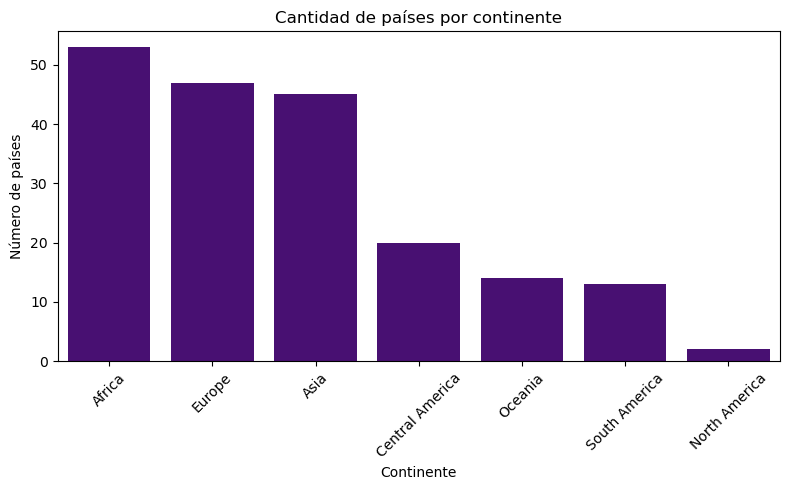

In [ ]:
# 1. Contar países por continente
continent_counts = df['continent'].value_counts()

# 2. Calcular el porcentaje del continente con más países
top_percent = (continent_counts.max() / len(df) * 100)

print(f"Continente con más países: {continent_counts.idxmax()}")
print(f"Porcentaje: {top_percent:.2f}%")


# 3. Gráfico en Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=continent_counts.index, y=continent_counts.values, color = 'indigo' )

plt.ylabel("Número de países")
plt.xlabel("Continente")
plt.title("Cantidad de países por continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. ¿Cuáles son los 10 países con la mayor área forestal?

In [21]:
df['forested_area'].dtype

dtype('float64')

In [23]:
# 1. Obtener los 10 países con mayor área forestal
top10_forested = df[['country', 'forested_area']].sort_values(by='forested_area', ascending=False).head(10)
top10_forested

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


Este es el orden de los países con mayor área florestal, ordenados de mayor a menor:


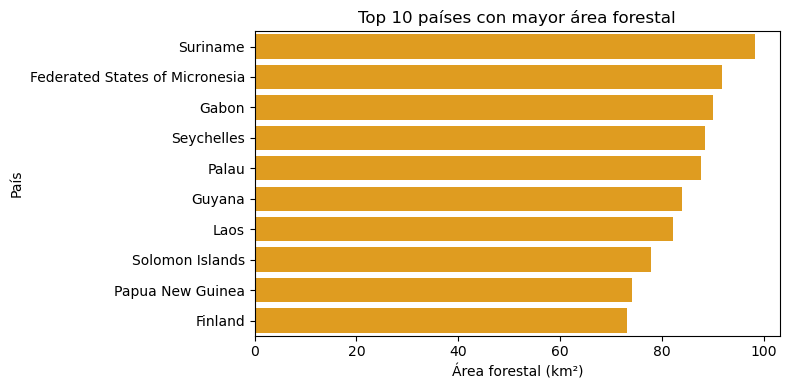

In [45]:
# 2. Gráfico horizontal
print(f"Este es el orden de los países con mayor área florestal, ordenados de mayor a menor:")

plt.figure(figsize=(8,4))
sns.barplot(x='forested_area', y='country', data=top10_forested, color='orange')
plt.xlabel("Área forestal (km²)")
plt.ylabel("País")
plt.title("Top 10 países con mayor área forestal")
plt.tight_layout()
plt.show()

3. ¿Cómo se distribuye la densidad de población entre los países?

Los 10 países con mayor densidad de población:


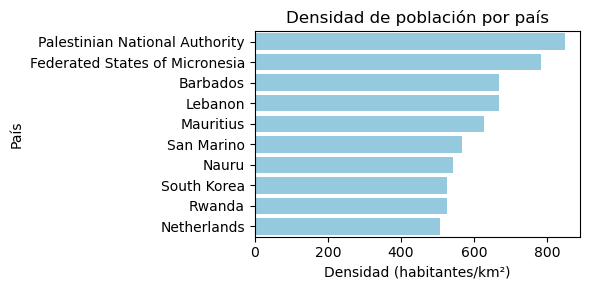

In [132]:
print("Los 10 países con mayor densidad de población:")
plt.figure(figsize=(6,3))
sns.barplot(x='density', y='country', data=df.sort_values('density', ascending=False).head(10), color='skyblue')
plt.xlabel("Densidad (habitantes/km²)")
plt.ylabel("País")
plt.title("Densidad de población por país")
plt.tight_layout()
plt.show()

Los 10 países con menor densidad de población:


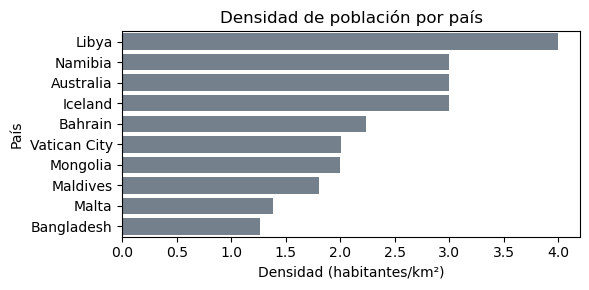

In [131]:
print("Los 10 países con menor densidad de población:")
plt.figure(figsize=(6,3))
sns.barplot(x='density', y='country', data=df.sort_values('density', ascending=False).tail(10), color='slategray')
plt.xlabel("Densidad (habitantes/km²)")
plt.ylabel("País")
plt.title("Densidad de población por país")
plt.tight_layout()
plt.show()

4. ¿Existe una relación entre el PIB y la tasa de desempleo de los países?

5. ¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?